### Обробка та аналіз БМД, лабораторна №7
Гулякевич Анна БС-83 

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
table1=[]
table1 = [10,5,2,6,5,2,1,13,7,3,10,]
table2=[]
table2 = [1,12,16,14,12,15,13,17,17,6,11]
data = pd.DataFrame({
    'Март': table1,
    'Май': table2
}, index=np.arange(1, len(table1)+1))
data.columns.name = 'Количество пропусков по группе за месяц'
data.index.name = 'Дни'
data

Количество пропусков по группе за месяц,Март,Май
Дни,,
1,10,1
2,5,12
3,2,16
4,6,14
5,5,12
6,2,15
7,1,13
8,13,17
9,7,17


[]

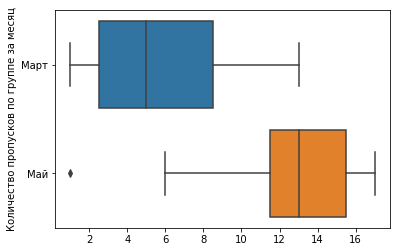

In [3]:
sns.boxplot(data=data, orient='h').set()

In [4]:
def get_sigma(array,n):
    s=0
    mean=(sum(array))/n
    for i in range (n):
        s+=((array[i]-mean))**2
    return s/(n-1)
def levene(x,y):
    n=len(x)
    m=len(y)
    s1=get_sigma(x,n)
    s2=get_sigma(y,m)
    if s1>s2:
        f=s1/s2
    else:
        f=s2/s1
    print('Отримане значення критерію Лівеня : F = ' + str(f))
    df1=n-1
    df2=m-1
    print('Значення ступенів свободи: df1 = ' + str(df1) + "; df2 = " + str(df2))
    table = pd.read_excel("file:///D:\бмд\BMDlabs\laba7\Таблиця%20критичних%20значень%20для%20критерію%20Лівеня.xlsx").iloc[df1,df2]
    print("Критичне значення критерію Лівеня = " + str(table))
    if f<table:
        result = " результат оцінки значимості зв'зку - not significant"
    else:
        result = " результат оцінки значимості зв'зку -  significant"
    return result

In [5]:
def student (x,y,flag):
    if flag=="significant":
        n=len(x)
        m=len(y)
        s1=get_sigma(x,n)
        s2=get_sigma(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df=n+m-2
        t=(abs(m1-m2))/(math.sqrt((s1/n)+(s2/m)))
    elif flag=="not significant":
        n=len(x)
        m=len(y)
        s1=sd(x,n)
        s2=sd(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df1=n-1
        df2=m-1
        df=n+m-2
        k=(1/n)+(1/m)
        t=(abs(m1-m2))/(math.sqrt(((df1*s1+df2*s2)/df)*k))
    else:
        return "You input the wrong flag"
    print('Отримане значення критерію Стьюдента: t = ' + str(t))
    print('Значення ступеня свободи: df = ' + str(df))
    table = pd.read_excel("file:///D:\бмд\BMDlabs\laba7\Таблиця%20критичних%20значень%20для%20критерію%20Стьюдента.xlsx").iloc[df-1,1]
    print("Критичне значення критерію Стьюдента = " + str(table))
    if t<table:
        result = " результат оцінки значимості зв'язку - significant"
    else:
        result = " результат оцінки значимості зв'зку -  not significant"
    return result

In [6]:
levene(table1,table2)

Отримане значення критерію Лівеня : F = 1.5880923450789795
Значення ступенів свободи: df1 = 10; df2 = 10
Критичне значення критерію Лівеня = 2.98


" результат оцінки значимості зв'зку - not significant"

In [7]:
student(table1,table2,"significant")

Отримане значення критерію Стьюдента: t = 3.3915110817805645
Значення ступеня свободи: df = 20
Критичне значення критерію Стьюдента = 2.086


" результат оцінки значимості зв'зку -  not significant"

### Висновок

#### 1.В даному випадку приймають нульову гіпотезу, оскільки розраховане значення менше критичного.Fкр > F

#### 2.Розраховане значення t більше критичного - нульову гіпотезу відхиляють та роблять висновок про статистичну відмінність середніх.